<h1 style="color: black; font-family: Arial, sans-serif; text-decoration: underline;text-align: center;">BODY CALORIES PREDICTION</h1>

<h2 style="color: black; font-family: Arial, sans-serif;">
In today's health-conscious world, tracking the number of calories burned during physical activity is essential for fitness planning and weight management. This project aims to develop a machine learning model that can predict calories burned based on physiological and activity-related parameters.
We use Linear Regression, a fundamental and widely used algorithm in supervised learning, to model the relationship between calories burned and input features like:
Age,
Height,
Weight,
Duration of activity,
Heartbeat,
Body Temperature.</p>
By training our model on these features, we aim to accurately predict the number of calories burned during exercise, helping individuals get insights into their physical performance and better manage their health.
This project demonstrates data preprocessing, model training, evaluation using metrics like R², RMSE, and MAE, and highlights the significance of each feature in predicting energy expenditure.</h2>

In [3]:
## impport libraries
import pandas as pd
import numpy as np

<h2 style="color: black ; font-family: Arial, sans-serif;"> CALORIES RECORDED FOR EACH PERSON</h2>

In [4]:
data = pd.read_csv('calories.csv')

In [5]:
data.head(5)

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


<h2 style="color: black ; font-family: Arial, sans-serif;">Import Exercise data and merge the Calories from the other table</h2>

In [6]:
data1 = pd.read_csv("exercise.csv")

In [7]:
data1.head(4)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5


In [8]:
Calories = pd.concat([data1, data['Calories']],axis=1)

In [9]:
Calories.head(3)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0


<h2 style="color: black ; font-family: Arial, sans-serif;">Exploratory Data Analysis (EDA)</h2>

In [10]:
Calories.shape

(15000, 9)

In [11]:
Calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [13]:
Calories.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [14]:
Calories.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

<h2 style="color: black ; font-family: Arial, sans-serif;">Gender-wise Participant Count</h2>

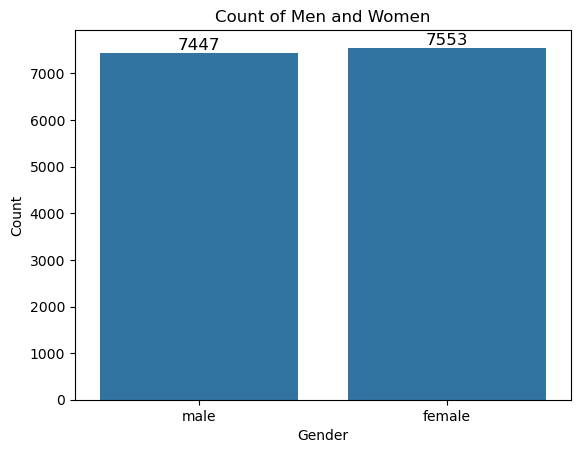

In [21]:
ax = sns.countplot(x='Gender', data=Calories)
for p in ax.patches:
    count = int(p.get_height())
    ax.text(p.get_x() + p.get_width()/2, count + 0.1, count, 
            ha='center', va='bottom', fontsize=12)
    
plt.title("Count of Men and Women")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

<h2 style="color: black ; font-family: Arial, sans-serif;">Visualize the distribution of a numeric values in each feature</h2>

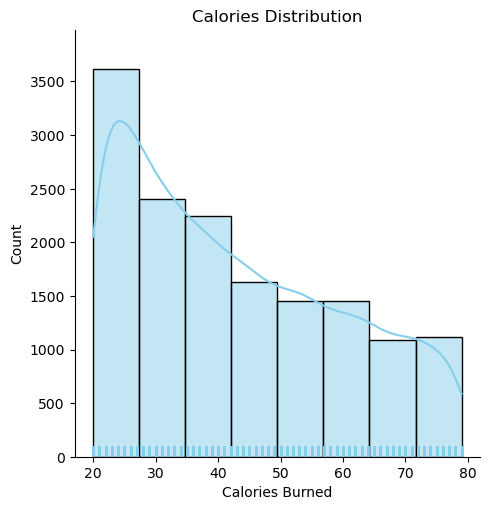

In [28]:
sns.displot(Calories['Age'], kde=True, bins=8, color='skyblue', rug = True)
plt.title("Calories Distribution")
plt.xlabel("Calories Burned")
plt.ylabel("Count")
plt.show()

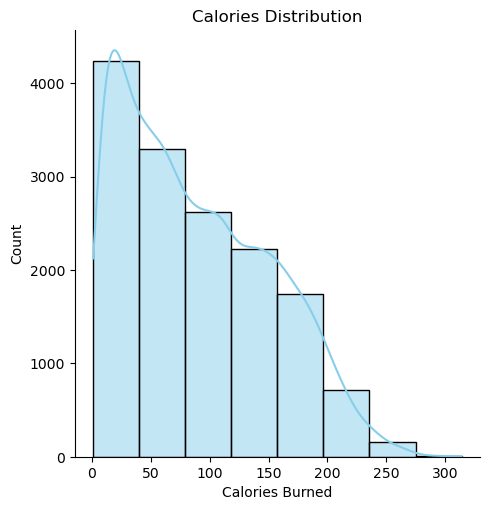

In [31]:
sns.displot(Calories['Calories'], kde=True, bins=8, color='skyblue')
plt.title("Calories Distribution")
plt.xlabel("Calories Burned")
plt.ylabel("Count")
plt.show()

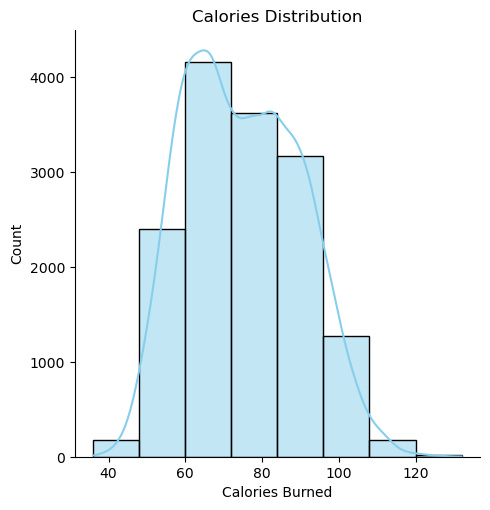

In [32]:
sns.displot(Calories['Weight'], kde=True, bins=8, color='skyblue')
plt.title("Calories Distribution")
plt.xlabel("Calories Burned")
plt.ylabel("Count")
plt.show()

In [34]:
Calories['Gender'] = Calories['Gender'].replace({'male': 1, 'female': 0}).astype(int)

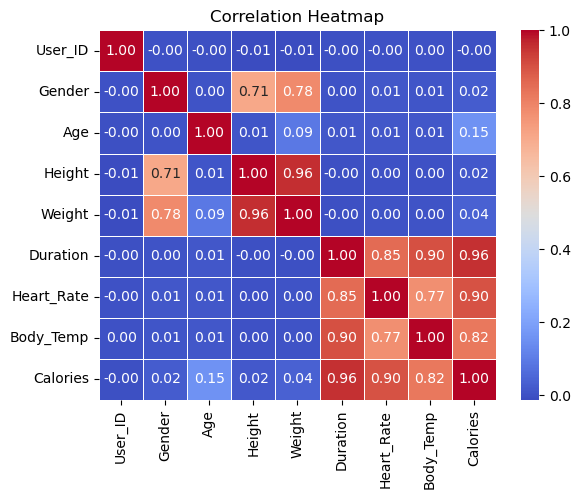

In [39]:
correlation = Calories.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [40]:
x = Calories.drop(columns =['User_ID','Calories'], axis =0)

In [41]:
y = Calories.Calories

In [42]:
x.head(3)

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,1,68,190.0,94.0,29.0,105.0,40.8
1,0,20,166.0,60.0,14.0,94.0,40.3
2,1,69,179.0,79.0,5.0,88.0,38.7


In [35]:
y

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x, y, random_state = 0, test_size = 0.2)

In [45]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(12000, 7) (12000,) (3000, 7) (3000,)


In [46]:
from xgboost import XGBRegressor

In [47]:
model = XGBRegressor()

In [48]:
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [49]:
predtest = model.predict(x_test)

In [50]:
predtest

array([ 42.158726,  16.409174,  99.261345, ...,  26.832329, 148.18468 ,
       153.74557 ], dtype=float32)

In [52]:
from sklearn import metrics

In [53]:
MAS = metrics.mean_absolute_error(y_test, predtest)

In [54]:
MAS

1.5211099035541216

In [55]:
import pickle

In [56]:
with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)
